<a href="https://colab.research.google.com/github/A-Istrate/80629_Project/blob/main/ML_TPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import copy
from random import seed
from random import random
import matplotlib.pyplot as plt  # import matplotlib for plotting and visualization
import matplotlib
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import os
from tensorflow.keras import layers
from sklearn.utils import class_weight

Checking our images

In [2]:
## images path
path = pathlib.Path(r"C:\Users\istra\Google Drive\Cours HEC\Maitrise\Semestre 2\Machine_Learning\TP GROUPE\book_covers")
image_count=len(list(path.glob('*/*.jpg')))
print(image_count)

53378


Checking a childrens book

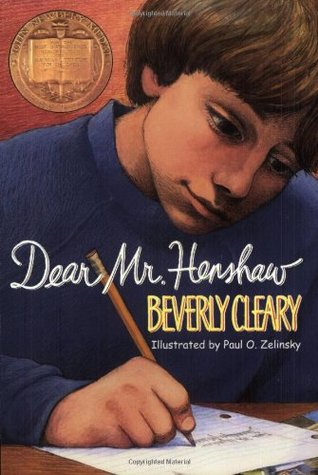

In [3]:
children = list(path.glob('Childrens/*'))
PIL.Image.open(str(children[12]))

Creating a dataset

In [4]:
batch_size =32
img_height = 96
img_width =64
train_img =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=80629,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 53378 files belonging to 14 classes.
Using 42703 files for training.


In [5]:
valid_img =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=80629,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 53378 files belonging to 14 classes.
Using 10675 files for validation.


In [6]:
valid_img2 =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=80629,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 53378 files belonging to 14 classes.
Using 10675 files for validation.


Classes

In [7]:
class_names = train_img.class_names
print(class_names)
print(len(class_names))

['Childrens', 'Classics', 'Cultural', 'Fantasy', 'Historical', 'History', 'Horror', 'Mystery', 'Other', 'Poetry', 'Romance', 'Science Fiction', 'Sequential Art', 'Young Adult']
14


Visualisation

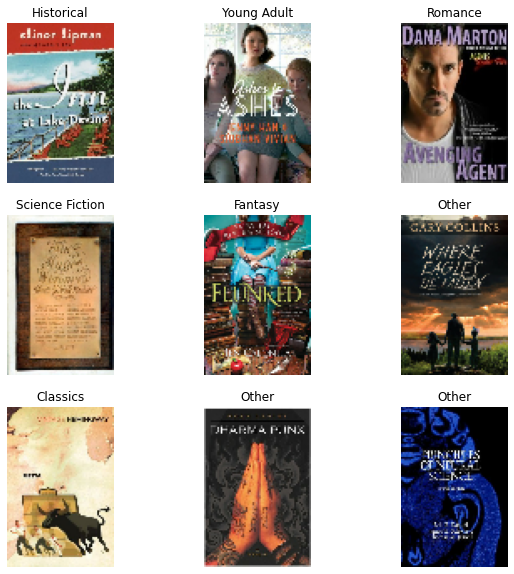

In [8]:
plt.figure(figsize=(10,10))
for images, labels in train_img.take(1):
  for i in range(9):
    ax:plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Size off the data

In [9]:
for image_batch, labels_batch in train_img:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 96, 64, 3)
(32,)


Standardisation

In [10]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

Setting the model

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_img = train_img.cache().prefetch(buffer_size=AUTOTUNE)
valid_img = valid_img.cache().prefetch(buffer_size=AUTOTUNE)

num_classes=14

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3,strides=1, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, 3,strides=1,  activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3,strides=1,  activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        epsilon=0.1
    ),
    #"tf.keras.optimizers.RMSprop(
    #learning_rate=0.0001, rho=0.9, momentum=0.0, epsilon=0.01,   
    #name='RMSprop'
    #),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
tclasses = [[c.numpy() for c in object[1]]for object in train_img]
train_classes = np.concatenate(tclasses).ravel()
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_classes),
                                                 train_classes)

C:\Users\istra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13], y=[ 1 10 12 ...  2  0 10] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [14]:
class_weights_dict =dict(enumerate(class_weights))

Training

In [ ]:
model = tf.keras.models.load_model("model_3.h5")

In [ ]:
history = model.fit(
    train_img,
    validation_data=valid_img,
    #class_weight=class_weights_dict,
    epochs=60
)

Saving our model after 3 iterations

In [ ]:
model_3 = model

In [ ]:
model_3.save("model_32.h5")

In [15]:
model_3 = tf.keras.models.load_model("model_32.h5")

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
predictions = model_3.predict(valid_img)
predicted_classes = np.argmax(predictions, axis=1)

In [27]:
second_place = np.argsort(predictions,axis=1)[:,-2]
third_place = np.argsort(predictions,axis=1)[:,-3]

In [17]:
vclasses = [[c.numpy() for c in object[1]]for object in valid_img]
validation_classes = np.concatenate(vclasses).ravel()

In [75]:
def prediction_score(valid,predictions,cnames=class_names):
    pred = np.argmax(predictions, axis=1)
    pred2 = np.argsort(predictions,axis=1)[:,-2]
    pred3 = np.argsort(predictions,axis=1)[:,-3]
    dict_c = dict(enumerate(cnames))
    scores=[]
    for v,p1,p2,p3 in zip(valid,pred,pred2,pred3):
        score=0
        if v == p1: score=1
        elif v == p2: score =0.75
        elif v == p3: score =0.5
        scores.append([dict_c.get(v),score])
    scores_df = pd.DataFrame(scores,columns=["genre","score"])
    meanscore =np.round(scores_df["score"].mean(),3)
    print("The average score is %s" %meanscore)
    return scores_df.groupby("genre").mean("score")


In [76]:
prediction_score(validation_classes,predictions)

The average score is 0.572


,score
genre,
Childrens,0.263320
Classics,0.325696
Cultural,0.083696
Fantasy,0.665390
Historical,0.199324
History,0.097534
Horror,0.103070
Mystery,0.220414
Other,0.926130


In [18]:
from sklearn.metrics import classification_report
print(classification_report(validation_classes, predicted_classes, target_names=class_names))

                 precision    recall  f1-score   support

      Childrens       0.34      0.09      0.15       244
       Classics       0.53      0.13      0.20       611
       Cultural       0.00      0.00      0.00       230
        Fantasy       0.39      0.43      0.41      1566
     Historical       0.30      0.03      0.06       666
        History       0.62      0.04      0.08       223
         Horror       0.20      0.02      0.03       228
        Mystery       0.27      0.06      0.10       507
          Other       0.42      0.80      0.55      3848
         Poetry       0.00      0.00      0.00       192
        Romance       0.35      0.18      0.24       883
Science Fiction       0.17      0.04      0.06       397
 Sequential Art       0.34      0.24      0.28       306
    Young Adult       0.20      0.11      0.14       774

       accuracy                           0.40     10675
      macro avg       0.30      0.15      0.16     10675
   weighted avg       0.35   